In [1]:
import pandas as pd
import sqlite3


## make a connection to the database

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [3]:
query = '''
SELECT *
FROM pageviews
WHERE uid LIKE 'user_%'
'''
pageviews = pd.io.sql.read_sql(query, conn)
pageviews

index      uid                    datetime
0       12  user_30  2020-04-17 22:46:26.785035
1       14  user_14  2020-04-18 10:53:52.623447
2       15  user_17  2020-04-18 10:56:55.833899
3       16  user_14  2020-04-18 10:57:37.331258
4       18  user_17  2020-04-18 12:05:48.200144
..     ...      ...                         ...
982   1073  user_28  2020-05-21 18:45:20.441142
983   1074  user_19  2020-05-21 23:03:06.457819
984   1075  user_25  2020-05-21 23:23:49.995349
985   1078   user_5  2020-05-22 11:30:18.368990
986   1079  user_17  2020-05-22 18:22:22.847815

[987 rows x 3 columns]

## create a new dataframe where the visits are counted and grouped by date

In [4]:
pageviews['datetime'] = pd.to_datetime(pageviews['datetime'])
pageviews['date'] = pageviews['datetime'].dt.date
daily_visits = pageviews.groupby('date').size().reset_index(name='views')
daily_visits

date  views
0   2020-04-17      1
1   2020-04-18     23
2   2020-04-19     15
3   2020-04-21      3
4   2020-04-22      1
5   2020-04-23      5
6   2020-04-25      1
7   2020-04-26      8
8   2020-04-28      2
9   2020-04-29      4
10  2020-04-30      9
11  2020-05-01      3
12  2020-05-02      6
13  2020-05-03     19
14  2020-05-04      1
15  2020-05-05      1
16  2020-05-06      3
17  2020-05-07      2
18  2020-05-08     48
19  2020-05-09     19
20  2020-05-10    110
21  2020-05-11    200
22  2020-05-12     85
23  2020-05-13    102
24  2020-05-14    187
25  2020-05-15     29
26  2020-05-16      4
27  2020-05-17      9
28  2020-05-18     51
29  2020-05-19     11
30  2020-05-20     12
31  2020-05-21     11
32  2020-05-22      2

## create a graph
the size of the font should be 8

the size of the figure is (15,8)

the graph must have the title Views per day

notice the rotation of xticks on the graph below

<Axes: title={'center': 'Views per day'}, xlabel='date'>

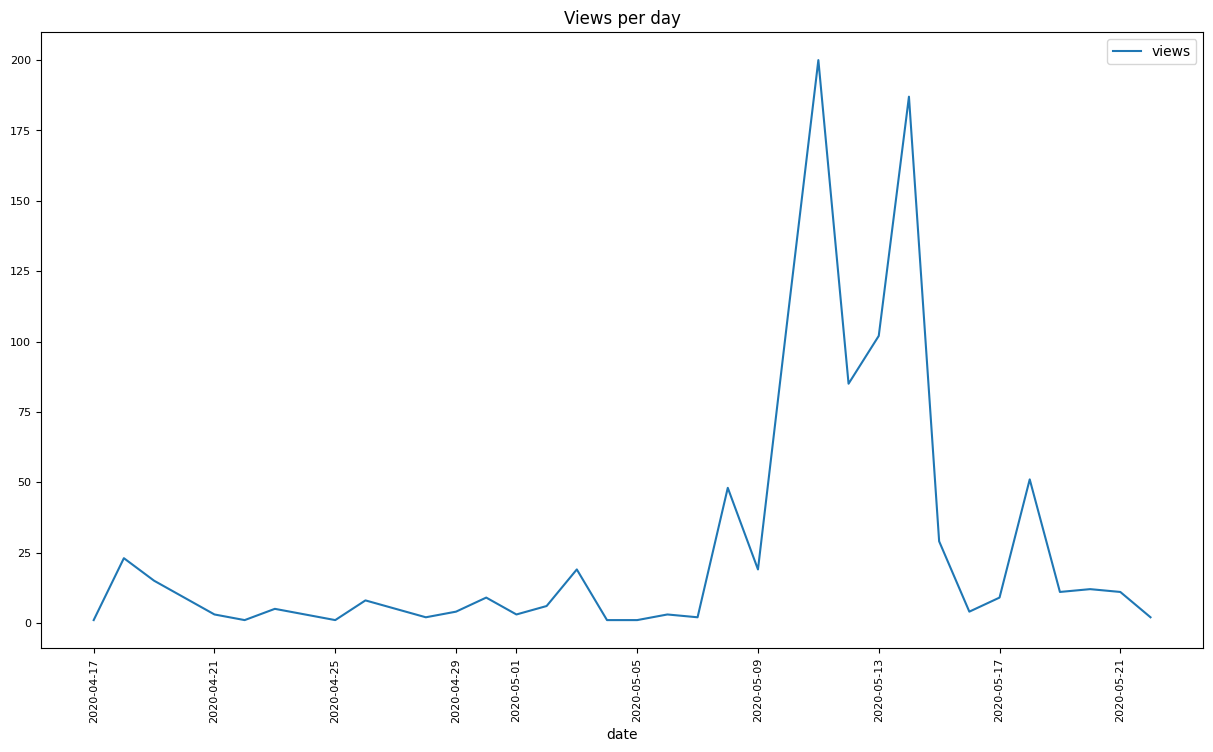

In [5]:
daily_visits.plot(x='date', y='views', figsize=(15, 8), title='Views per day', rot=90, fontsize=8)

## close the connection

In [6]:
conn.close()